# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/cesurdagli/Desktop/Capstone Project/Feb17NoNull_Merged.csv')


In [3]:
df['pass_fail1']=df['pass_fail'].map({'PASS':1, 'FAIL':0})


In [4]:
#replacing empty values with null values
df=df.replace(r'^\s+$', np.nan, regex=True)

In [5]:
#Dropping the null values
df=df[df['reason'].notnull() & df['highestEd'].notnull() & df['level'].notnull()]


In [6]:
# Recoding the categorical values
clean_nums = {'highestEd': {'DD':5, 'MD':4, 'BD':3, 'HS':2, 'AD':1, 'OT':0},
                  'reason': {'review':4, 'learn':3, 'assignment':2, 'curious':1, 'other':0},
                  'level': {'confident':2, 'some':1, 'little':0},
             'testLevel': {'GR':1, 'UG':0}}
df.replace(clean_nums, inplace=True)
df[['highestEd', 'reason', 'level']].head()

,highestEd,reason,level
0,2,2,2
1,3,2,2
2,3,2,2
3,4,2,1
4,2,2,2


In [7]:
df.columns

Index(['Unnamed: 0', 'email', 'pass_fail', 'right_question', 'wrong_question',
       'testID', 'testTakenTime', 'testDuration', 'testLevel', 'taskCompleted',
       'viewedVideoCases', 'viewedDemVideos', 'integrationCompleted',
       'practiceTestTaken', 'quality_Satisfaction1', 'authenticProblems1',
       'demonstration1', 'application1', 'activation1', 'ALT2', 'ALT3',
       'quality_Satisfaction2', 'demonstration2', 'demonstration3', 'ALT4',
       'authenticProblems2', 'integration1', 'activation2',
       'authenticProblems3', 'integration2', 'application3', 'integration3',
       'activation3', 'application4', 'demonstration5', 'comments',
       'ALT1Reversed', 'demonstration4Reversed',
       'quality_Satisfaction3Reversed', 'quality_Satisfaction4Reversed', 'age',
       'highestEd', 'degreeOther', 'reason', 'reasonOther', 'level',
       'ave_quality_Satisfaction', 'ave_authenticProblems', 'ave_ALT',
       'ave_activation', 'ave_demonstration', 'ave_application',
       'a

# Logistic Regression

The problem I would like to solve is to predict whether not a student will pass a certification test based on the data available.

Various algorithms will be used to address this binary classification problem.

I will use Logistic Regression, which is a statistical method for predicting binary classes, for this classification problem to predict student mastery level.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Define the features
X=df[['testLevel', 'highestEd', 'reason','level', 'quality_Satisfaction1', 'authenticProblems1',
       'demonstration1', 'application1', 'activation1', 'ALT2', 'ALT3',
       'quality_Satisfaction2', 'demonstration2', 'demonstration3', 'ALT4',
       'authenticProblems2', 'integration1', 'activation2',
       'authenticProblems3', 'integration2', 'application3', 'integration3',
       'activation3', 'application4', 'demonstration5',
       'ALT1Reversed', 'demonstration4Reversed',
       'quality_Satisfaction3Reversed', 'quality_Satisfaction4Reversed']].values
print("X: ", type(X), X.shape)

# Define the target
y = (df.pass_fail1 == 1).values
print("y: ", type(y), y.shape)
print("df.pass_fail shape: ", df.pass_fail1.shape)

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state=5)

X:  <class 'numpy.ndarray'> (9579, 29)
y:  <class 'numpy.ndarray'> (9579,)
df.pass_fail shape:  (9579,)


In [9]:

print("\n")
print("Xlr:", Xlr, type(Xlr), Xlr.shape, len(Xlr)) #TrainX


print("\n")
print("Xtestlr", Xtestlr, type(Xtestlr), Xtestlr.shape, len(Xtestlr)) #TestX


print("\n")
print("ylr", ylr, type(ylr), ylr.shape, len(ylr)) #Trainy


print("\n")
print("ytestlr", ytestlr, type(ytestlr), ytestlr.shape, len(ytestlr)) #Testy




Xlr: [[1. 3. 2. ... 5. 5. 5.]
 [0. 1. 2. ... 5. 5. 5.]
 [1. 3. 2. ... 4. 5. 5.]
 ...
 [0. 0. 2. ... 3. 3. 3.]
 [0. 2. 2. ... 4. 4. 4.]
 [0. 2. 2. ... 3. 3. 3.]] <class 'numpy.ndarray'> (7184, 29) 7184


Xtestlr [[1. 3. 2. ... 4. 4. 4.]
 [0. 3. 2. ... 3. 4. 4.]
 [0. 2. 4. ... 3. 5. 3.]
 ...
 [0. 2. 2. ... 4. 4. 4.]
 [1. 3. 2. ... 3. 4. 4.]
 [0. 2. 2. ... 3. 3. 3.]] <class 'numpy.ndarray'> (2395, 29) 2395


ylr [ True False  True ... False False False] <class 'numpy.ndarray'> (7184,) 7184


ytestlr [ True False False ...  True False False] <class 'numpy.ndarray'> (2395,) 2395


In [10]:
# Construct the LogisticRegression model

clf = LogisticRegression()

# Fit the model on the training data.
clf.fit(Xlr, ylr) 

# Print the accuracy from the testing data.

y_predict_test = clf.predict(Xtestlr)
print("\n")
print("[Test] Accuracy score (y_predict_test, ytestlr):",accuracy_score(y_predict_test, ytestlr))


# Printout the training score
y_predict_training = clf.predict(Xlr)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(ylr, y_predict_training))



[Test] Accuracy score (y_predict_test, ytestlr): 0.7803757828810021


[Training] Accuracy score: (ylr, y_predict_training) 0.7700445434298441


Since the model's test accuracy (0.78) is pretty close to the training accuracy (0.77), then I can say that there is no "variance" between the training accuracy and the test accuracy. This is an indication that the model will "generalize well", which means that the model will be well-behaved when new data is presented to it.

In [11]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(ytestlr, y_predict_test)
cnf_matrix

# In the output, 1869 (1852+17) are actual predictions, and 526 (510+16) are incorrect predictions.

array([[1852,   16],
       [ 510,   17]])

In [12]:
print("Accuracy:",metrics.accuracy_score(y_predict_test, ytestlr))
print("Precision:",metrics.precision_score(ytestlr, y_predict_test))
print("Recall:",metrics.recall_score(ylr, y_predict_training))

Accuracy: 0.7803757828810021
Precision: 0.5151515151515151
Recall: 0.027239709443099273


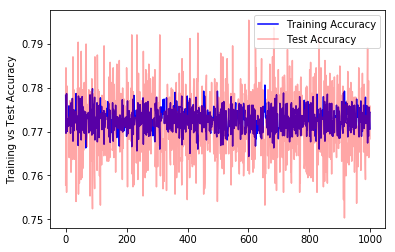

In [13]:
# Try multiple splits and see the effects, with the same proportion 75% train and 25% test

# keep lists for training accuracy, test accuracy, and the difference
# between the latter and the former
training_accuracy = []
test_accuracy = []
accuracy_difference = []

# define number of trials
n_splits = 1000

# define LogisticRegression object
clf = LogisticRegression()

# loop over multiple trials
for i in range(0, n_splits):
    # do split for this iteration, using shuffle and a different random_state 
    # for every iteration
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(df[['testLevel', 'highestEd', 'reason','level', 'quality_Satisfaction1', 'authenticProblems1',
       'demonstration1', 'application1', 'activation1', 'ALT2', 'ALT3',
       'quality_Satisfaction2', 'demonstration2', 'demonstration3', 'ALT4',
       'authenticProblems2', 'integration1', 'activation2',
       'authenticProblems3', 'integration2', 'application3', 'integration3',
       'activation3', 'application4', 'demonstration5',
       'ALT1Reversed', 'demonstration4Reversed',
       'quality_Satisfaction3Reversed', 'quality_Satisfaction4Reversed']].values, 
                                              (df.pass_fail1 == 1).values,random_state=i)
    # fit on the training set
    clf.fit(Xlr, ylr)
    
    # predict on training set
    y_predict_training = clf.predict(Xlr)
    
    # predict on test set
    y_predict_test = clf.predict(Xtestlr)
    
    # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
#end for
#
# plot both curves
# ref: https://matplotlib.org/users/pyplot_tutorial.html
# parameter alpha below is a percentage of transparency
# ref: https://matplotlib.org/users/legend_guide.html
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

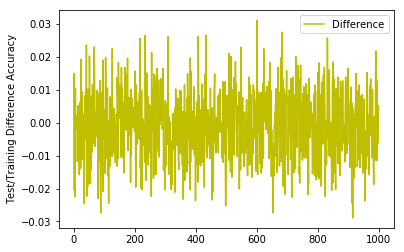

In [14]:
# Accuracy difference plot
diff_plot, = plt.plot(accuracy_difference, 'y')
plt.legend([diff_plot], ['Difference'])
plt.ylabel('Test/Training Difference Accuracy')
plt.show()

In [15]:
# Use sklearn.metrics.classification_report for a more comprehensive
# performance analysis


from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report:]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report:]
             precision    recall  f1-score   support

      False       0.77      0.99      0.87      5536
       True       0.50      0.02      0.04      1648

avg / total       0.71      0.77      0.68      7184

[Test Classification Report:]
             precision    recall  f1-score   support

      False       0.78      0.99      0.87      1864
       True       0.41      0.02      0.05       531

avg / total       0.70      0.78      0.69      2395



# Classification Report

Precision answers to the question of “for all instances classified positive, what percent was correct?” Precision score shows the accuracy of positive predictions, which is defined as the ratio of number of cases that were positive and predicted positive to all cases (either positive or negative in actual) that were predicted as positive. In my case, the accuracy of positive predictions for the FAIL case in the training and test set are found 0.77 and 0.78, respectively, which means that my classifier correctly marked 77/78 out of 100 fail cases as the fail cases who were actually the fail cases. However, The precision score for the pass cases for the training and test sets are found low as 0.5 and 0.41, respectively. 

Recall focuses on “for all instances that were actually positive, what percent was classified correctly?” Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. In my case, recall scores for the fail group in the both the training and test sets are found 0.99, which can be interpreted as my classifier was able to get 99 percent of actual fail cases correctly. However, the recall score for the actual pass cases are very low, 0.02, which means only two percent of the pass cases were correctly classified as the pass cases.

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0. Here, F1 scores for the fail class is very high, 0.87. However, it is very low for the pass class, 0.04.
